<a href="https://colab.research.google.com/github/jepkorir433/week5-Assignment--Al-Development-Workflow/blob/main/AI_system_to_predict_patient_readmission_risk_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preview:
        age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty       diag_1  \
0             2            0            0           Missing  Circulatory   
1             0            0            0             Other        Other   
2             0            0            0           Missing  Circulatory   
3             1            0            0           Missing  Circulatory   
4             0            0            0  InternalMedicine        Other   

        diag_2       diag_3 glucose_test A1Ctest chan

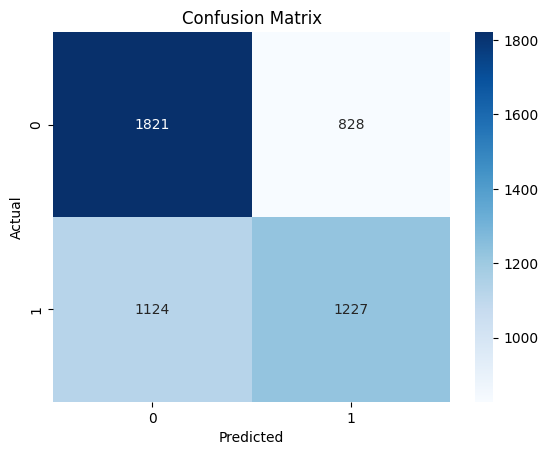

Model saved as 'readmission_predictor.pkl'


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# === Load Your Dataset ===
# Replace 'your_data.csv' with your actual uploaded filename
df = pd.read_csv('hospital_readmissions.csv')

# === Preview & Clean ===
print("Data Preview:\n", df.head())
print("\nColumns:", df.columns)

# === Example: Rename / Adjust Columns if Needed ===
# df.rename(columns={'old_name': 'new_name'}, inplace=True)

# === Encode Categorical Variables ===
# Example: Encode Gender
if 'gender' in df.columns:
    df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Identify other categorical columns to encode
categorical_cols = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']

# Apply one-hot encoding to the identified categorical columns
df = pd.get_dummies(df, columns=categorical_cols)


# === Drop or Fill Missing Values ===
df = df.dropna()

# === Split Features & Target ===
# Replace 'readmitted' with the name of your target column if different
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Encode target variable if it's not already numeric
if y.dtype == 'object':
    y = y.map({'yes': 1, 'no': 0})

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# === Train Model with Hyperparameter Tuning ===
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# === Evaluate Model ===
y_pred = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === Plot Confusion Matrix ===
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# === Save Model for Deployment ===
joblib.dump(best_model, 'readmission_predictor.pkl')
print("Model saved as 'readmission_predictor.pkl'")